In [2]:
s = "Seun"
print(s)

Seun


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

melbourne_file_path = './data/melb_data.csv'
sales_file_path = './data/sales_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
sales_data = pd.read_csv(sales_file_path)

In [7]:
print(melbourne_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
print(melbourne_data.shape)

(13580, 21)


Text(0.5, 1.0, 'Correlation Matrix')

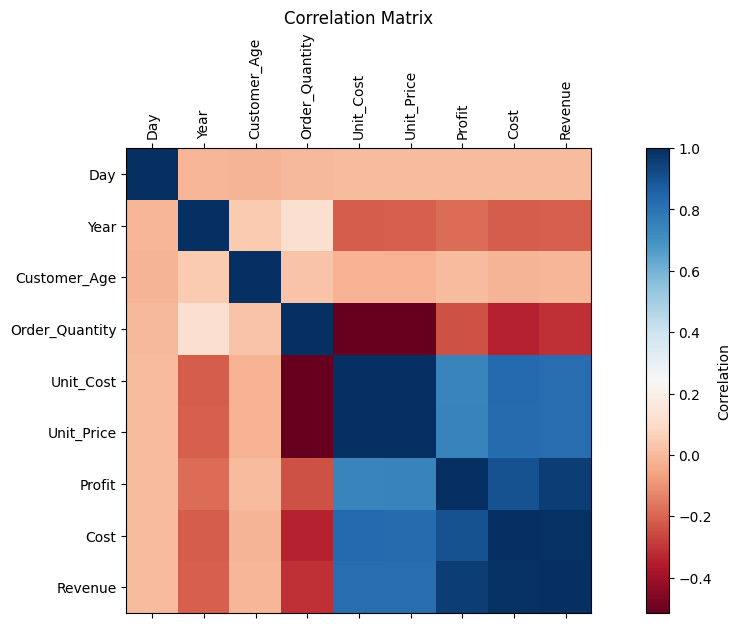

In [12]:
numeric_cols = sales_data.select_dtypes(include=['number'])
correla = numeric_cols.corr()
figure = plt.figure(figsize=(14, 6))
plt.matshow(correla, fignum=figure.number, cmap='RdBu')
plt.xticks(range(len(correla.columns)), correla.columns, rotation=90)
plt.yticks(range(len(correla.columns)), correla.columns)
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')